Objective:

The goal of this assignment is to provide a hands-on experience with fundamental concepts in Machine Learning. 
Participants will learn how to preprocess data, apply a basic machine learning model, and evaluate its performance.

In [71]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


#Task 1:Understanding the Dataset

In [72]:
#loading the data from CSV file in a dataframe

df= pd.read_csv("titanic.csv") # reads csv file
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [50]:
# Checking the shape—i.e. size—of the data
df.shape

#Learning the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
# Getting the statistical summary of dataset

df.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [52]:
# Print duplicate rows
print(df.duplicated().sum()) #2072 duplicates

# Remove duplicate rows
#test = test.drop_duplicates()
#print(test)

0


In [53]:
# Checking for the missing values

print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
TOTAL MISSING VALUES: 866


In [34]:
#df.dropna(inplace=True) # removes any rows in the DataFrame that contain NaN values

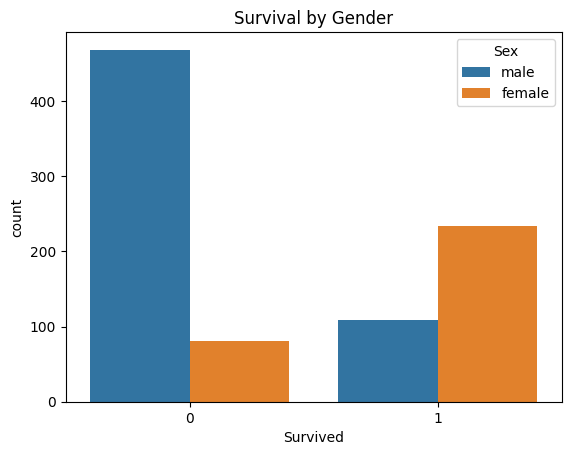

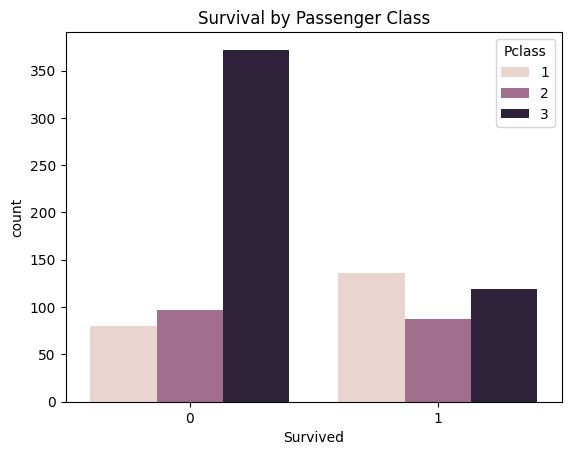

In [54]:
#Exploratory Data Analysis (EDA) to understand the distribution of data.

# Survival counts by gender and class
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

•	Survival Analysis:
o	Females had a much higher survival rate (~74%) than males.
o	Passengers in 1st class were more likely to survive.


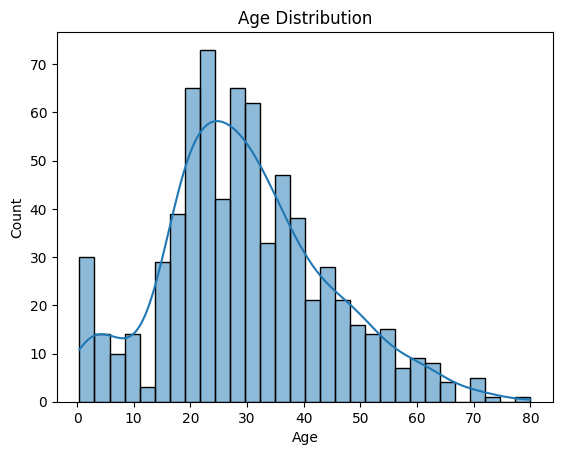

In [55]:
# Age Distribution

sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

According to above graph: Younger passengers had a slightly higher chance of survival.

2.Data Preprocessing

In [73]:

# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing), Ticket, Name and passengerId, not required 

df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

In [58]:
df.head() # printing dataset

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [59]:
# Encode Categorical Variables

cat_vars = ['Sex', 'Embarked']
le = LabelEncoder()
for col in cat_vars:
    df[col] = le.fit_transform(df[col])

In [60]:
df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.0      1      0   7.2500         2
1           1       1    0  38.0      1      0  71.2833         0
2           1       3    0  26.0      0      0   7.9250         2
3           1       1    0  35.0      1      0  53.1000         2
4           0       3    1  35.0      0      0   8.0500         2
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    1  27.0      0      0  13.0000         2
887         1       1    0  19.0      0      0  30.0000         2
888         0       3    0  28.0      1      2  23.4500         2
889         1       1    1  26.0      0      0  30.0000         0
890         0       3    1  32.0      0      0   7.7500         1

[891 rows x 8 columns]

3. Applying a Machine Learning Model

In [61]:
# Features and Target
X = df.drop('Survived', axis=1) #input features
y = df['Survived'] #target variable

# # Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
 # Model Training 
# Initialize a RandomForestClassifier model 

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train) ## Fit the model to the training data

RandomForestClassifier(random_state=42)

In [64]:
# Predict on the test data and calculate the accuracy of the base model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_proba = model.predict_proba(X_test)[:, 1]

4.Evaluating Model Performance

In [70]:
#Evaluation

print("\n--- Accuracy ---\n", accuracy_score(y_test, y_pred))
print("\n--- Classification Report ---\n", classification_report(y_test, y_pred))



--- Accuracy ---
 0.8212290502793296

--- Classification Report ---
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [66]:
# Testing a DecisionTreeClassifier as a model  

from sklearn.tree import DecisionTreeClassifier #importing library

model_d=  DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model_d.fit(X_train, y_train)

# Predict on the test data and calculate the accuracy of the base model
y_pred_d = model_d.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_d)

print(f'Base Model Accuracy: {accuracy * 100:.2f}%') # Printbase model accuracy
print(classification_report(y_test, y_pred_d))

Base Model Accuracy: 78.21%
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



In [68]:
#  Testing Logistic Regression Model
from sklearn.linear_model import LogisticRegression #import library

model_l = LogisticRegression() #choosing LogisticRegression as a model
model_l.fit(X_train, y_train) #model fitting

# Predict on the test data and calculate the accuracy of the base model
y_pred_l = model_l.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_l)

print(f'Base Model Accuracy: {accuracy * 100:.2f}%') # Printbase model accuracy
print(classification_report(y_test, y_pred_l))


Base Model Accuracy: 81.01%
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



The accuracy of RandomForestClassifier model is 82.12% from the above results, which makes it as a best fir model

Visualize the results of RandomForestClassifier model using confusion matrix and ROC curve

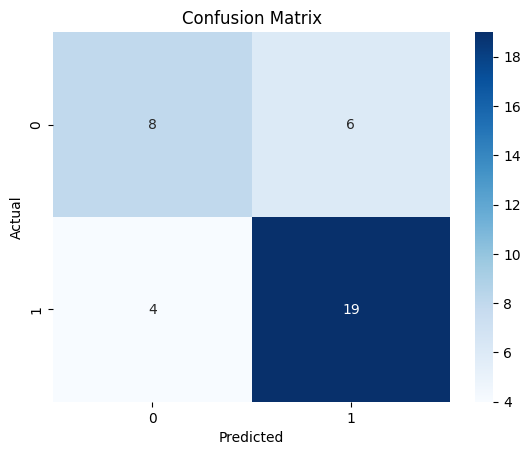

In [47]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


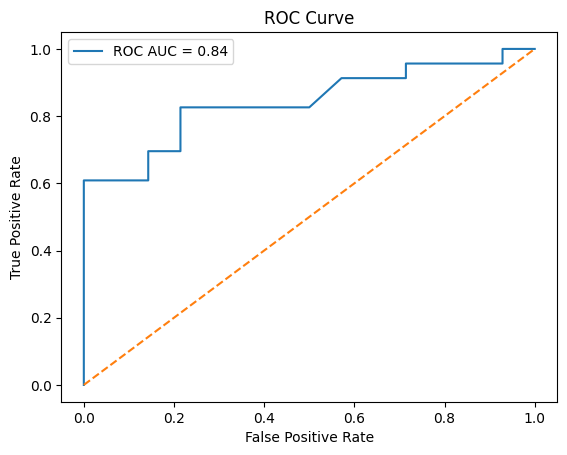

In [48]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Results interpretation:

1) Confusion Matrix and ROC Curve visualizations provided clear insights into performance.
2) RandomForestClassifier Model performed especially well in identifying survivors.

Insights and Improvements

Key Predictors: Sex, Pclass, and Age were among the most important features.

Improvements:
Hyperparameter tuning (e.g., using GridSearchCV) could improve results.

 Conclusion
The Random Forest model achieved high predictive accuracy and effectively captured important relationships in the Titanic dataset.
It confirms historical insights, such as higher survival among women and first-class passengers. 
